## Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import pandas as pd
import math

## Reading Data from csv files.

In [ ]:
data=pd.read_csv("data_2020_2023_1d")
data4=pd.read_csv("data_2020_2023_1d")
data5=pd.read_csv("data_2020_2023_1d")
data8=pd.read_csv("data_2020_2023_1d")
ddf1=pd.read_csv("data_2020_2023_1d")
ddf2=pd.read_csv("data_2020_2023_1d")
ddf4=pd.read_csv("data_2020_2023_1d")

In [ ]:
ddf1['Portfolio Value']=0
ddf1['No. of Stocks']=0
ddf1['Profit from Initial Capital in %']=0
ddf1['Current Position']=0

In [ ]:
ddf2['Portfolio Value']=0
ddf2['No. of Stocks']=0
ddf2['Profit from Initial Capital in %']=0
ddf2['Current Position']=0

In [ ]:
ddf4['Portfolio Value']=0
ddf4['No. of Stocks']=0
ddf4['Profit from Initial Capital in %']=0
ddf4['Current Position']=0

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-16,33.660000,34.500000,33.080002,34.040001,34.040001,4267500
1,2019-05-17,33.560001,35.060001,33.500000,34.610001,34.610001,4496400
2,2019-05-20,34.130001,34.689999,34.009998,34.660000,34.660000,2017000
3,2019-05-21,34.919998,35.290001,34.750000,34.860001,34.860001,2028200
4,2019-05-22,34.750000,35.389999,34.669998,35.250000,35.250000,1726500
...,...,...,...,...,...,...,...
1255,2024-05-10,49.110001,49.360001,48.549999,49.099998,49.099998,955200
1256,2024-05-13,49.099998,49.669998,48.549999,48.570000,48.570000,967100
1257,2024-05-14,49.110001,49.540001,48.689999,48.730000,48.730000,1290400
1258,2024-05-15,48.779999,49.470001,48.240002,49.320000,49.320000,1255400


## Reading Historical Data(Risk Free Rate)

In [ ]:
data3 = yf.download('^TNX', start='2019-05-16', end='2024-05-16')
data3.reset_index(inplace=True)
data3

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-16,2.382,2.414,2.380,2.405,2.405,0
1,2019-05-17,2.370,2.409,2.364,2.393,2.393,0
2,2019-05-20,2.386,2.418,2.380,2.416,2.416,0
3,2019-05-21,2.428,2.441,2.419,2.426,2.426,0
4,2019-05-22,2.412,2.414,2.386,2.393,2.393,0
...,...,...,...,...,...,...,...
1254,2024-05-09,4.516,4.516,4.447,4.449,4.449,0
1255,2024-05-10,4.477,4.508,4.471,4.504,4.504,0
1256,2024-05-13,4.487,4.489,4.459,4.481,4.481,0
1257,2024-05-14,4.481,4.532,4.443,4.445,4.445,0


## Indicator Calculation (MAC-D)

In [ ]:
def calculate_macd(data,short_period,long_period,signal_line_period):
  data['EMA_short_period']=data['Close'].ewm(span=short_period,adjust=False).mean()
  data['EMA_long_period']=data['Close'].ewm(span=long_period,adjust=False).mean()
  data['MACD']=data['EMA_short_period']-data['EMA_long_period']
  data['Signal_MACD']=data['MACD'].ewm(span=signal_line_period,adjust=False).mean()
  data['signals']=0
  buy_signals=[]
  sell_signals=[]
  for i in range(0,len(data)):
        if data['MACD'].iloc[i]>data['Signal_MACD'].iloc[i] and data['MACD'].iloc[i-1]<data['Signal_MACD'].iloc[i-1]:
            data['signals'].iloc[i]=1
            buy_signals.append(i)
        elif data['MACD'].iloc[i]<data['Signal_MACD'].iloc[i] and data['MACD'].iloc[i-1]>data['Signal_MACD'].iloc[i-1]:
            data['signals'].iloc[i]=-1
            sell_signals.append(i)
        else:
            data['signals'].iloc[i]=0
  return data,buy_signals,sell_signals

In [ ]:
data7,buy_signals,sell_signals=calculate_macd(data,12,26,9)
data7

Plot of MACD Indicator (MACD Line and Signal Line)

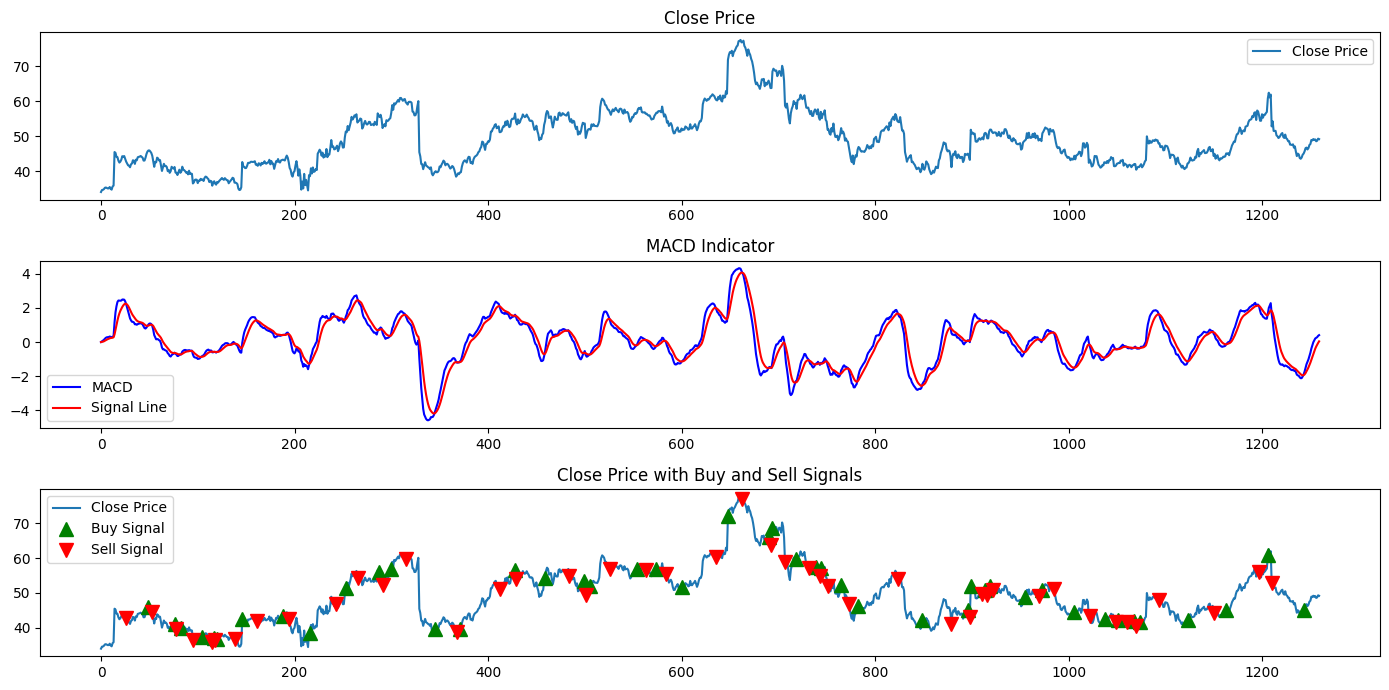

In [ ]:
plt.figure(figsize=(14, 7))
#plot for closing price
plt.subplot(3, 1, 1)
plt.plot(data7.index,data7['Close'], label='Close Price')
plt.title('Close Price')
plt.legend()
#plot for MACD and Signal line
plt.subplot(3, 1, 2)
plt.plot(data7.index,data7['MACD'], label='MACD', color='blue')
plt.plot(data7.index,data7['Signal_MACD'], label='Signal Line', color='red')
plt.title('MACD Indicator')
plt.legend()
#plot for Buy and Sell Signals
plt.subplot(3, 1, 3)
#plot for closing price
plt.plot(data7.index,data7['Close'],label='Close Price')
#plot buy signals
plt.plot(buy_signals,data7['Close'][buy_signals],'^', markersize=10, color='g', label='Buy Signal')
#plot sell signals
plt.plot(sell_signals, data7['Close'][sell_signals],'v', markersize=10, color='r', label='Sell Signal')
plt.title('Close Price with Buy and Sell Signals')
plt.legend()
plt.tight_layout()
plt.show()

## Indicator Calculation (Bollinger *Bands*)

In [ ]:
def calculate_bb(data,multiplier):
  data['SMA']=data['Close'].rolling(window=20).mean()
  data['SD']=data['Close'].rolling(window=20).std()
  data['Upper_Band']=data['SMA']+multiplier*data['SD']
  data['Lower_Band']=data['SMA']-multiplier*data['SD']
  data['signals']=0
  buy_signals2=[]
  sell_signals2=[]
  for i in range(len(data)):
    if (data['Close'][i] < data['Lower_Band'][i]):
      data['signals'][i]=1
      buy_signals2.append(i)
    elif (data['Close'][i] > data['Upper_Band'][i]):
      data['signals'][i]=-1
      sell_signals2.append(i)
    else:
      data['signals'][i]=0
  return data,buy_signals2,sell_signals2

In [ ]:
data2,buy_signals2,sell_signals2=calculate_bb(data5,2)
data2

Plot of Bollinger Bands Indicator

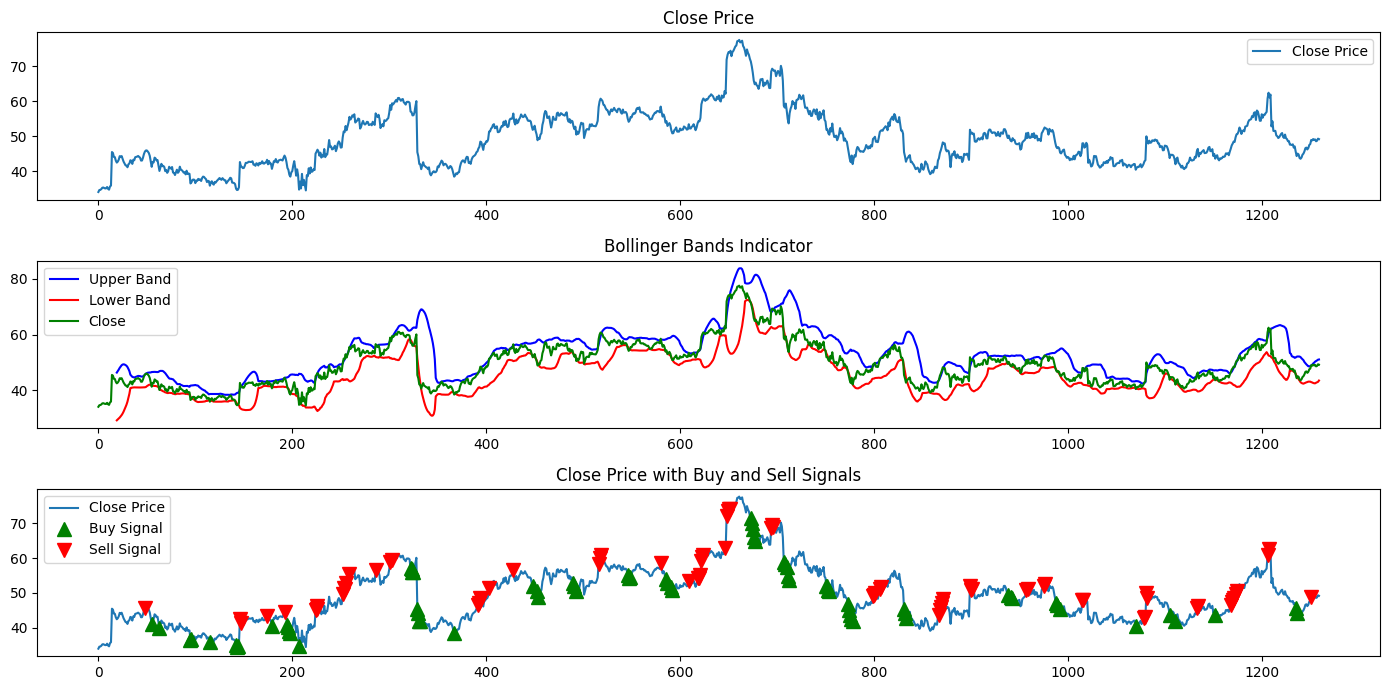

In [ ]:
plt.figure(figsize=(14, 7))
#plot for closing price
plt.subplot(3, 1, 1)
plt.plot(data2.index,data2['Close'], label='Close Price')
plt.title('Close Price')
plt.legend()
#plot for Upper Band and Lower Band
plt.subplot(3, 1, 2)
plt.plot(data2.index,data2['Upper_Band'], label='Upper Band', color='blue')
plt.plot(data2.index,data2['Lower_Band'], label='Lower Band', color='red')
plt.plot(data2.index,data2['Close'], label='Close', color='green')
plt.title('Bollinger Bands Indicator')
plt.legend()
#plot for Buy and Sell Signals
plt.subplot(3, 1, 3)
#plot for closing price
plt.plot(data2.index,data2['Close'],label='Close Price')
#plot buy signals
plt.plot(buy_signals2,data2['Close'][buy_signals2],'^', markersize=10, color='g', label='Buy Signal')
#plot sell signals
plt.plot(sell_signals2, data2['Close'][sell_signals2],'v', markersize=10, color='r', label='Sell Signal')
plt.title('Close Price with Buy and Sell Signals')
plt.legend()
plt.tight_layout()
plt.show()

## Indicator Calculation (RSI)

In [ ]:
def calculate_RSI(data):
    period=14
    data['price_change']=data['Close']-data['Close'].shift(1)
    data['gain']=data['price_change'].apply(lambda x:x if x > 0 else 0)
    data['loss']=data['price_change'].apply(lambda x:abs(x) if x < 0 else 0)
    data['avg_gain']=data['gain'].rolling(window=period,min_periods=1).mean()
    data['avg_loss']=data['loss'].rolling(window=period,min_periods=1).mean()
    data['RS']=data['avg_gain']/data['avg_loss']
    data['RSI']=100-(100/(1+data['RS']))
    data['signals']=0
    buy_signals3=[]
    sell_signals3=[]
    for i in range(len(data)):
      if(data['RSI'][i]<30) :
        data['signals'][i]=1
        buy_signals3.append(i)
      elif(data['RSI'][i]>70) :
        data['signals'][i]=-1
        sell_signals3.append(i)
      else:
        data['signals'][i]=0
    return data,buy_signals3,sell_signals3

In [ ]:
data9,buy_signals3,sell_signals3=calculate_RSI(data8)
data9

Plot of RSI Indicator

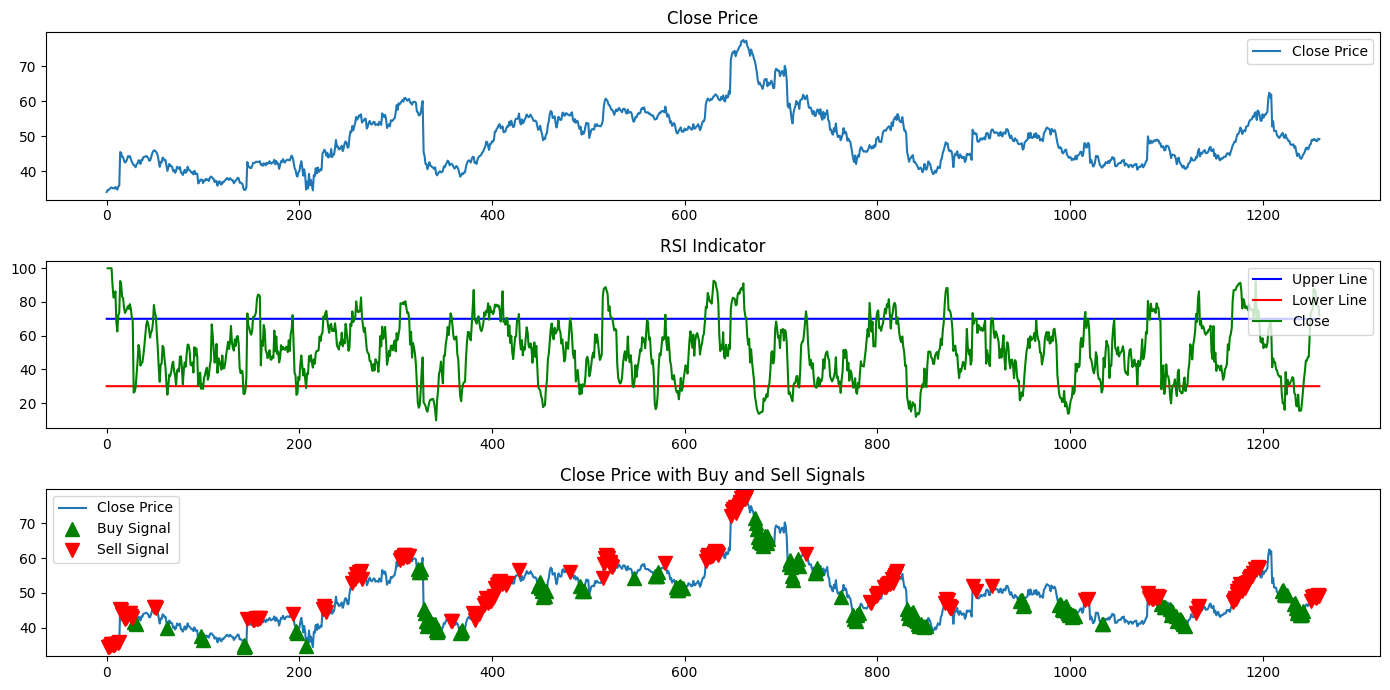

In [ ]:
list1=[]
list2=[]
for i in range(len(data9)):
  list1.append(30)
  list2.append(70)
plt.figure(figsize=(14, 7))
#plot for closing price
plt.subplot(3, 1, 1)
plt.plot(data2.index,data2['Close'], label='Close Price')
plt.title('Close Price')
plt.legend()
#plot for Upper Band and Lower Band
plt.subplot(3, 1, 2)
plt.plot(data9.index,list2, label='Upper Line', color='blue')
plt.plot(data9.index,list1, label='Lower Line', color='red')
plt.plot(data9.index,data9['RSI'], label='Close', color='green')
plt.title('RSI Indicator')
plt.legend()
#plot for Buy and Sell Signals
plt.subplot(3, 1, 3)
#plot for closing price
plt.plot(data9.index,data9['Close'],label='Close Price')
#plot buy signals
plt.plot(buy_signals3,data9['Close'][buy_signals3],'^', markersize=10, color='g', label='Buy Signal')
#plot sell signals
plt.plot(sell_signals3, data9['Close'][sell_signals3],'v', markersize=10, color='r', label='Sell Signal')
plt.title('Close Price with Buy and Sell Signals')
plt.legend()
plt.tight_layout()
plt.show()

## Main Function to Calculate all DataFrames and Strategy Metrics.

#### I have also included stop loss and take profit condition to minimize loss and risk and to maximize returns and profit

In [ ]:
def calculate(data1,ddf):
  num_buys=0 #Total no. of buy signals
  num_sells=0 #Total no. of sell signals
  buys=[] #List containing index of each buy trade
  sells=[] #List containing index of each sell trade
  trades=[] #List containing index of all trades

  balance=10000 #Initial Capital for Investing.

  a=0
  position=0 #Variable that tells the current position for each day
  capital=10000 #Capital During Trading (changes overtime)
  no_of_stocks=0
  num_stocks=[] #List of no. of stocks hold in each trade
  returns=[] #List containing return from each trade
  capitall=[] #List containing capital after each trade
  pf=[] #List containing portfolio after each trade
  remains=[] #List containing not invested capital for each trade
  max__drawdown=[] #List containing Max Drawdown for each trade
  max__dip=[] #List containing Max Dip for each trade
  positions=[] #List containing current position for each day
  stop_loss=10 # Percentage for stop loss
  take_profit=35  # Percentage for take profit
  close_by=[]
  #Main Function for the Strategy
  for i in range(len(data1)):
    if(capital>0):

      # Taking Long Position
      if data1['signals'].iloc[i]==1 and position==0:
          no_of_stocks=int(capital/data1['Close'].iloc[i])
          num_stocks.append(no_of_stocks)
          price=data1['Close'].iloc[i]
          remain1=capital-no_of_stocks*price
          remains.append(remain1)
          num_buys+=1
          buys.append(i)
          position=1
          trades.append(i)

      # Sell signal and in Long position
      elif data1['signals'].iloc[i]==-1 and position==1:
          returns.append(((data1['Close'].iloc[i]-price) / price)*100)
          pf.append((no_of_stocks*(data1['Close'].iloc[i])))
          capital=no_of_stocks*(data1['Close'].iloc[i])+remain1
          portfolio2=(no_of_stocks*(data1['Close'].iloc[i]))+remain1
          capitall.append(capital)
          close_by.append("signal")
          no_of_stocks=0
          position=0
          sells.append(i)
          num_sells+=1
          trades.append(i)

      # Long position with stop loss condition
      elif position==1 and data['Close'].iloc[i] < (1-(stop_loss/100))*price:
        returns.append(((data['Close'].iloc[i]-price)/price)*100)
        capital=no_of_stocks*(data['Close'].iloc[i])+remain1
        position=0
        sells.append(i)
        close_by.append("stop loss")
        capitall.append(capital)
        num_sells+=1
        trades.append(i)
        data1['signals'].iloc[i]=-1

      # Long position with take profit condition
      elif position==1 and data['Close'].iloc[i]>(1+(take_profit/100))*price:
        returns.append(((data['Close'].iloc[i]-price)/price)*100)
        capital=no_of_stocks*(data['Close'].iloc[i])+remain1
        position=0
        sells.append(i)
        close_by.append("take profit")
        capitall.append(capital)
        num_sells+=1
        trades.append(i)
        data1['signals'].iloc[i]=-1

      # Taking Short Position
      elif data1['signals'].iloc[i]==-1 and position==0:
          no_of_stocks=int(capital / data1['Close'].iloc[i])
          num_stocks.append(no_of_stocks)
          price=data1['Close'].iloc[i]
          remain2=capital-no_of_stocks*price
          remains.append(remain2)
          position=-1
          sells.append(i)
          num_sells+=1
          trades.append(i)

      # Buy signal and in short position
      elif data1['signals'].iloc[i]==1 and position==-1:
          returns.append(((price-data1['Close'].iloc[i])/price)*100)
          pf.append(capital+(no_of_stocks*(price-data1['Close'].iloc[i])))
          capital=capital+no_of_stocks*(price-data['Close'].iloc[i])
          capitall.append(capital)
          close_by.append("signal")
          no_of_stocks=0
          position=0
          num_buys+=1
          buys.append(i)
          trades.append(i)
       # Short position with stop loss condition
      elif position==-1 and data['Close'].iloc[i]>(1+(stop_loss/100))*price:
        returns.append(((price-data['Close'].iloc[i])/price)*100)
        capital=capital+no_of_stocks*(price-data['Close'].iloc[i])
        position=0
        num_buys+=1
        close_by.append("stop loss")
        buys.append(i)
        capitall.append(capital)
        trades.append(i)
        data1['signals'].iloc[i]=1

      # Short position with take profit condition
      elif position==-1 and data['Close'].iloc[i]<(1-(take_profit/100))*price:
        returns.append(((price-data['Close'].iloc[i])/price)*100)
        capital=capital+no_of_stocks*(price-data['Close'].iloc[i])
        position=0
        num_buys+=1
        capitall.append(capital)
        close_by.append("take profit")
        buys.append(i)
        trades.append(i)
        data1['signals'].iloc[i]=1

      if(position== 1 or -1):
        positions.append(i)
    else:
      print("Capital Wiped-OFF")
      break

  if(num_buys!=num_sells):
    # Changing the signal of the last trade to 0 ,that is no position.
    data1['signals'].iloc[trades[num_buys+num_sells-1]]=0
    num_closetrades=max(num_buys,num_sells)-1 #Total no. of close trades
    trades.pop()
    num_stocks.pop()
  else:
    num_closetrades=num_buys

  #Creating a DataFrame for TradeWise Details.
  twd=pd.DataFrame(columns=['Returns for Trade in %', 'Type of Trade','Trade Close By', 'Max Drawdown for Trade', 'Max Dip for Trade', 'No. of stocks Traded','Capital'])

  #Type of Trade (long or short)
  for i in range(0,len(trades),2):
    if(data1['signals'].iloc[trades[i]]==1):
      type="long"
    else:
      type="short"

    #Filling different columns of the DataFrame twd.
    new_row = {'Returns for Trade in %':0, 'Type of Trade':type, 'Max Drawdown for Trade':0, 'Max Dip for Trade':0, 'No. of stocks Traded':0}
    twd.loc[len(twd)]=new_row

  #Calculating Maximum Drawdown and Maximum Dip for each Trade.
  a=0
  for i in range(0,num_closetrades*2,2):
    drawdown=[]
    index1=trades[i]
    index2=trades[i+1]
    stocks=num_stocks[a]
    remain=remains[a]
    max1=(stocks*data1['Close'].iloc[index1])+remain
    min1=(stocks*data1['Close'].iloc[index1])+remain
    for j in range(index1,index2+1):
      if data1['signals'].iloc[index1]==1:
        ddf['Current Position'].iloc[j]=1
        ddf['No. of Stocks'].iloc[j]=stocks
        ddf['Portfolio Value'].iloc[j]=(stocks*data1['Close'].iloc[j])+remain
        ddf['Current Position'].iloc[index2]=-1
        ddf['No. of Stocks'].iloc[index2]=0
      elif data1['signals'].iloc[index1]==-1:
        ddf['Current Position'].iloc[j]=-1
        ddf['No. of Stocks'].iloc[j]=stocks
        if(i>0):
          a5=ddf['Portfolio Value'].iloc[trades[i-1]]
        else:
          a5=balance
        ddf['Portfolio Value'].iloc[j]=a5+(stocks*(data1['Close'].iloc[index1]-data1['Close'].iloc[j]))
        ddf['Current Position'].iloc[index2]=1
        ddf['No. of Stocks'].iloc[index2]=0
      portfolio=(stocks*data1['Close'].iloc[j])+remain
      if (portfolio>max1):
        max1=portfolio
      if (portfolio<min1):
        min1=portfolio
      drawdown.append(((max1-portfolio)/portfolio)*100)
    max__drawdown.append(max(drawdown))
    max__dip.append(((((stocks*data1['Close'].iloc[index1])+remain)-min1)/((stocks*data1['Close'].iloc[index1])+remain))*100)
    a=a+1

  ddf['Portfolio Value'].iloc[0]=balance
  for i in range(1,len(ddf)):
    if ddf['Current Position'].iloc[i]==0:
      ddf['Portfolio Value'].iloc[i]=ddf['Portfolio Value'].iloc[i-1]
    ddf['Profit from Initial Capital in %'].iloc[i]=((ddf['Portfolio Value'].iloc[i] - balance)/balance)*100
  twd['Returns for Trade in %']=returns
  twd['Trade Close By']=close_by
  twd['No. of stocks Traded']=num_stocks
  twd['Capital']=capitall
  twd['Max Drawdown for Trade']=max__drawdown
  twd['Max Dip for Trade']=max__dip


  #Code

  #Benchmark Return and Total Returns
  num=int(balance/data1['Close'].iloc[0])
  remain_=balance-num*data1['Close'].iloc[0]
  br=((((num*data1['Close'].iloc[len(data1)-1])+remain_)-balance)/balance)*100
  print("Benchmark Return is:",br,"%")

  #Trades
  print("Number of Close Trades are:",num_closetrades)
  wt=0
  lt=0
  total_returns=0
  total_returns2=0
  for i in range(len(twd)):
    if(twd['Returns for Trade in %'].iloc[i]>0):
      wt+=1
    elif(twd['Returns for Trade in %'].iloc[i]<0):
      lt+=1
    total_returns+=twd['Returns for Trade in %'].iloc[i]
  print("Number of Winning Trades are:",wt)
  print("Number of Losing Trades are:",lt)
  print("Total Returns of Strategy:",(ddf['Profit from Initial Capital in %'].iloc[len(ddf)-1]),"%")
  #Gross Profit and Net Profit
  gp=(balance*(ddf['Profit from Initial Capital in %'].iloc[len(ddf)-1]))/100
  print("Gross Profit is:",gp)
  #Max Drawdown
  maxDrawdown=max(max__drawdown)
  print("Maximun Drawdown is:",maxDrawdown)
  #Avg. Drawdown
  avgDrawdown=twd['Max Drawdown for Trade'].mean()
  print("Average Drawdown is:",avgDrawdown)
  #Max Dip
  maxDip=max(twd['Max Dip for Trade'])
  print("Maximun Dip is:",maxDip)
  #Avg. Dip
  avgDip=twd['Max Dip for Trade'].mean()
  print("Average Dip is:",avgDip)
  #Sharpe Ratio and Sortino Ratio
  returns1=twd['Returns for Trade in %']
  rfr1=[]
  negative_returns1=[]
  entry1=trades[0]
  exit1=trades[len(trades)-1]
  for i in range(entry1,exit1+1):
    rfr1.append(data3['Close'].iloc[i])
  for i in range(len(twd)):
    if(twd['Returns for Trade in %'].iloc[i]<0):
      negative_returns1.append(twd['Returns for Trade in %'].iloc[i])
  mean_rfr1=sum(rfr1)/len(rfr1)
  mean_returns1=returns1.mean()
  mean_neg_returns1=sum(negative_returns1)/len(negative_returns1)
  array1=np.array(negative_returns1)
  std_neg_returns1=np.std(array1,ddof=1)
  std_returns1=returns1.std()
  y=((math.sqrt(252)))
  sharpeRatio1=y*((mean_returns1-mean_rfr1)/std_returns1)
  sortinoRatio1=y*((mean_returns1-mean_rfr1)/std_neg_returns1)
  print("Calculated Sharpe Ratio of the strategy is:",sharpeRatio1)
  print("Calculated Sortino Ratio of the strategy is:",sortinoRatio1)
  return twd,ddf,buys,sells

## Results for MACD Strategy

In [ ]:
a1,a2,buys1,sells1=calculate(data7,ddf1)

Benchmark Return is: 44.37485 %
Number of Close Trades are: 45
Number of Winning Trades are: 14
Number of Losing Trades are: 31
Total Returns of Strategy: -3.4240928200000598 %
Gross Profit is: -342.409282000006
Maximun Drawdown is: 54.04692047157514
Average Drawdown is: 7.744321093030751
Maximun Dip is: 34.72909024273322
Average Dip is: 4.568915517526738
Calculated Sharpe Ratio of the strategy is: -2.785382680398719
Calculated Sortino Ratio of the strategy is: -7.264453592347721


Plot

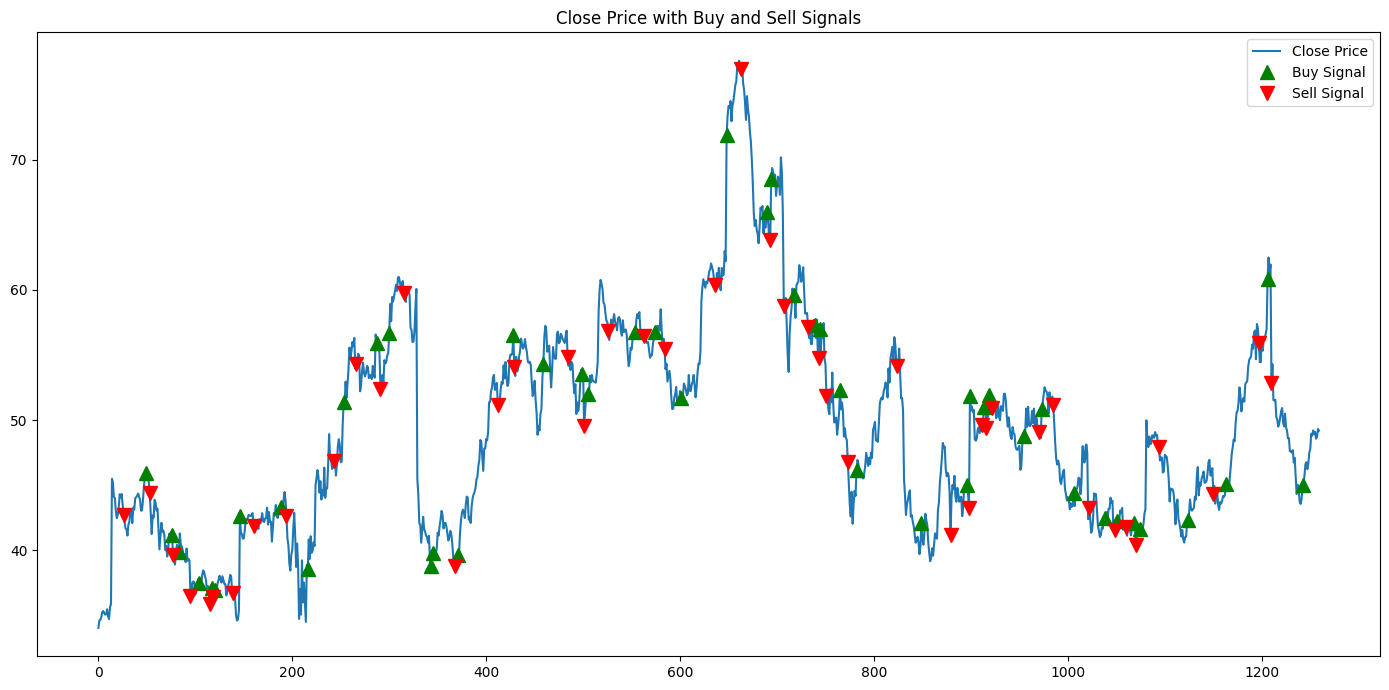

In [ ]:
plt.figure(figsize=(14, 7))
#plot for Buy and Sell Signals
#plot for closing price
plt.plot(data7.index,data7['Close'],label='Close Price')
#plot buy signals
plt.plot(buys1,data7['Close'][buys1],'^', markersize=10, color='g', label='Buy Signal')
#plot sell signals
plt.plot(sells1, data7['Close'][sells1],'v', markersize=10, color='r', label='Sell Signal')
plt.title('Close Price with Buy and Sell Signals')
plt.legend()
plt.tight_layout()
plt.show()

Tradewise DataFrame

In [ ]:
a1

,Returns for Trade in %,Type of Trade,Trade Close By,Max Drawdown for Trade,Max Dip for Trade,No. of stocks Traded,Capital
0,-7.487124,short,signal,3.897510,3.751302,233,9254.400699
1,7.228100,short,signal,12.319405,10.968190,208,9922.080491
2,-0.656239,short,signal,2.247000,1.788937,250,9857.079991
3,-2.822686,short,signal,2.786302,0.000000,270,9578.980531
4,-3.542541,short,signal,0.000000,0.000000,267,9239.890264
5,-1.372495,short,signal,0.772594,0.766670,253,9113.390264
6,-16.130784,short,signal,6.030434,5.687455,248,7645.230760
7,-3.389835,short,signal,6.374622,2.904297,182,7386.790396
8,9.523812,short,signal,24.241930,19.040613,173,8089.170569
9,-9.673284,short,signal,3.769163,2.317667,172,7310.010741


Daily DataFrame

In [ ]:
a2

,Date,Open,High,Low,Close,Adj Close,Volume,Portfolio Value,No. of Stocks,Profit from Initial Capital in %,Current Position
0,2019-05-16,33.660000,34.500000,33.080002,34.040001,34.040001,4267500,10000.000000,0,0.000000,0
1,2019-05-17,33.560001,35.060001,33.500000,34.610001,34.610001,4496400,10000.000000,0,0.000000,0
2,2019-05-20,34.130001,34.689999,34.009998,34.660000,34.660000,2017000,10000.000000,0,0.000000,0
3,2019-05-21,34.919998,35.290001,34.750000,34.860001,34.860001,2028200,10000.000000,0,0.000000,0
4,2019-05-22,34.750000,35.389999,34.669998,35.250000,35.250000,1726500,10000.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
1255,2024-05-10,49.110001,49.360001,48.549999,49.099998,49.099998,955200,9657.590718,0,-3.424093,0
1256,2024-05-13,49.099998,49.669998,48.549999,48.570000,48.570000,967100,9657.590718,0,-3.424093,0
1257,2024-05-14,49.110001,49.540001,48.689999,48.730000,48.730000,1290400,9657.590718,0,-3.424093,0
1258,2024-05-15,48.779999,49.470001,48.240002,49.320000,49.320000,1255400,9657.590718,0,-3.424093,0


## Results for Bollinger Bands Strategy.

In [ ]:
b1,b2,buys2,sells2=calculate(data2,ddf2)

Benchmark Return is: 44.37485 %
Number of Close Trades are: 41
Number of Winning Trades are: 23
Number of Losing Trades are: 18
Total Returns of Strategy: -2.3939999991853255e-05 %
Gross Profit is: -0.0023939999991853256
Maximun Drawdown is: 36.99029950208795
Average Drawdown is: 10.074098112059563
Maximun Dip is: 25.03548950935241
Average Dip is: 6.522996203479176
Calculated Sharpe Ratio of the strategy is: -2.2719447360538862
Calculated Sortino Ratio of the strategy is: -5.86107270548134


Plot

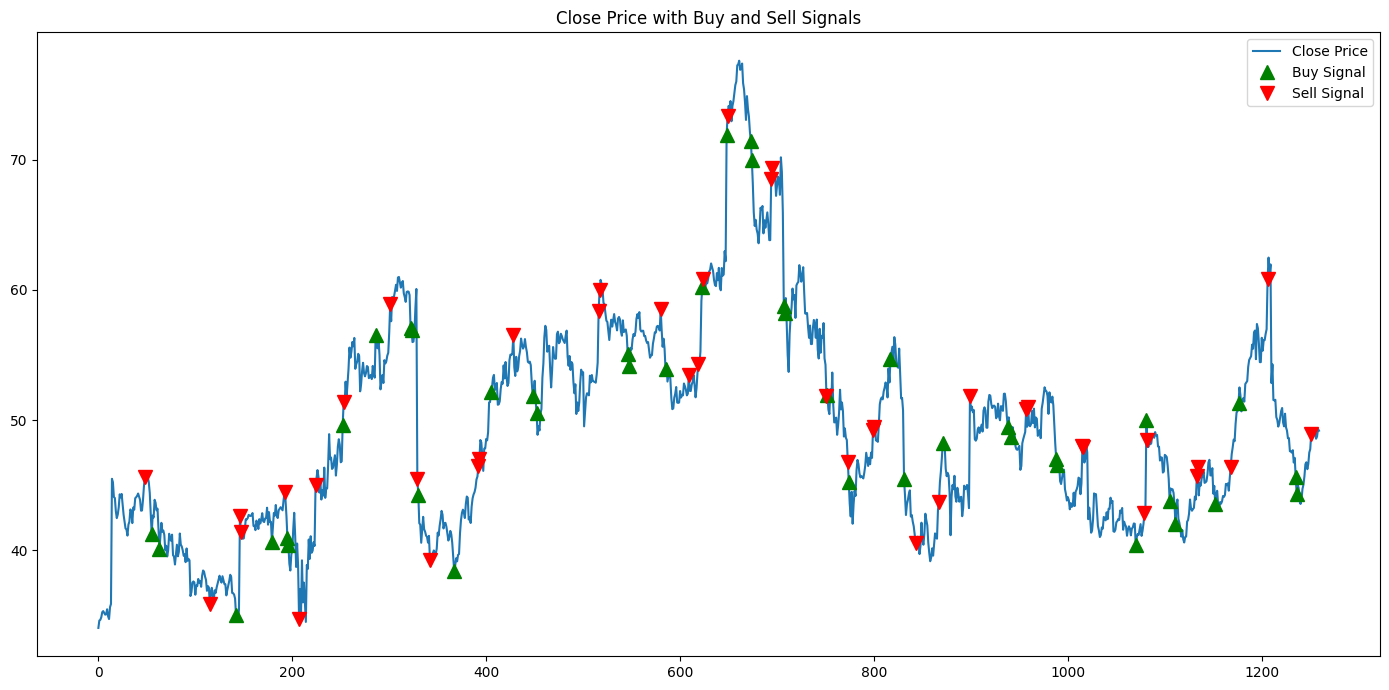

In [ ]:
plt.figure(figsize=(14, 7))
#plot for Buy and Sell Signals
#plot for closing price
plt.plot(data2.index,data2['Close'],label='Close Price')
#plot buy signals
plt.plot(buys2,data2['Close'][buys2],'^', markersize=10, color='g', label='Buy Signal')
#plot sell signals
plt.plot(sells2, data2['Close'][sells2],'v', markersize=10, color='r', label='Sell Signal')
plt.title('Close Price with Buy and Sell Signals')
plt.legend()
plt.tight_layout()
plt.show()

TradeWise DataFrame

In [ ]:
b1

,Returns for Trade in %,Type of Trade,Trade Close By,Max Drawdown for Trade,Max Dip for Trade,No. of stocks Traded,Capital
0,9.579130,short,signal,11.382325,9.570298,219,10957.029781
1,-10.531575,long,stop loss,17.429742,10.514351,273,9804.969235
2,21.771426,long,signal,1.126262,1.113718,280,11938.568955
3,1.715812,short,signal,6.381413,1.712775,288,12143.049819
4,7.960425,short,signal,8.646795,7.958629,273,13109.470092
5,-14.013368,long,stop loss,23.418649,13.988664,324,11275.630416
6,-10.259834,short,stop loss,6.941325,2.505397,250,10120.629666
7,-10.144079,short,stop loss,7.850838,0.369844,197,9094.259863
8,3.105903,short,signal,6.815369,3.098874,154,9376.079555
9,-20.147551,long,stop loss,31.968517,20.062545,164,7494.999391


Daily DataFrame

In [ ]:
b2

,Date,Open,High,Low,Close,Adj Close,Volume,Portfolio Value,No. of Stocks,Profit from Initial Capital in %,Current Position
0,2019-05-16,33.660000,34.500000,33.080002,34.040001,34.040001,4267500,10000.000000,0,0.000000,0
1,2019-05-17,33.560001,35.060001,33.500000,34.610001,34.610001,4496400,10000.000000,0,0.000000,0
2,2019-05-20,34.130001,34.689999,34.009998,34.660000,34.660000,2017000,10000.000000,0,0.000000,0
3,2019-05-21,34.919998,35.290001,34.750000,34.860001,34.860001,2028200,10000.000000,0,0.000000,0
4,2019-05-22,34.750000,35.389999,34.669998,35.250000,35.250000,1726500,10000.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
1255,2024-05-10,49.110001,49.360001,48.549999,49.099998,49.099998,955200,9999.997606,0,-0.000024,0
1256,2024-05-13,49.099998,49.669998,48.549999,48.570000,48.570000,967100,9999.997606,0,-0.000024,0
1257,2024-05-14,49.110001,49.540001,48.689999,48.730000,48.730000,1290400,9999.997606,0,-0.000024,0
1258,2024-05-15,48.779999,49.470001,48.240002,49.320000,49.320000,1255400,9999.997606,0,-0.000024,0


## Results for RSI Strategy

In [ ]:
c1,c2,buys3,sells3=calculate(data9,ddf4)

Benchmark Return is: 44.37485 %
Number of Close Trades are: 46
Number of Winning Trades are: 27
Number of Losing Trades are: 19
Total Returns of Strategy: -35.18131887999995 %
Gross Profit is: -3518.131887999995
Maximun Drawdown is: 31.87542928889177
Average Drawdown is: 10.047274207748925
Maximun Dip is: 18.6819164896757
Average Dip is: 6.1245344096131635
Calculated Sharpe Ratio of the strategy is: -3.458067853811172
Calculated Sortino Ratio of the strategy is: -7.700949925177664


Plot

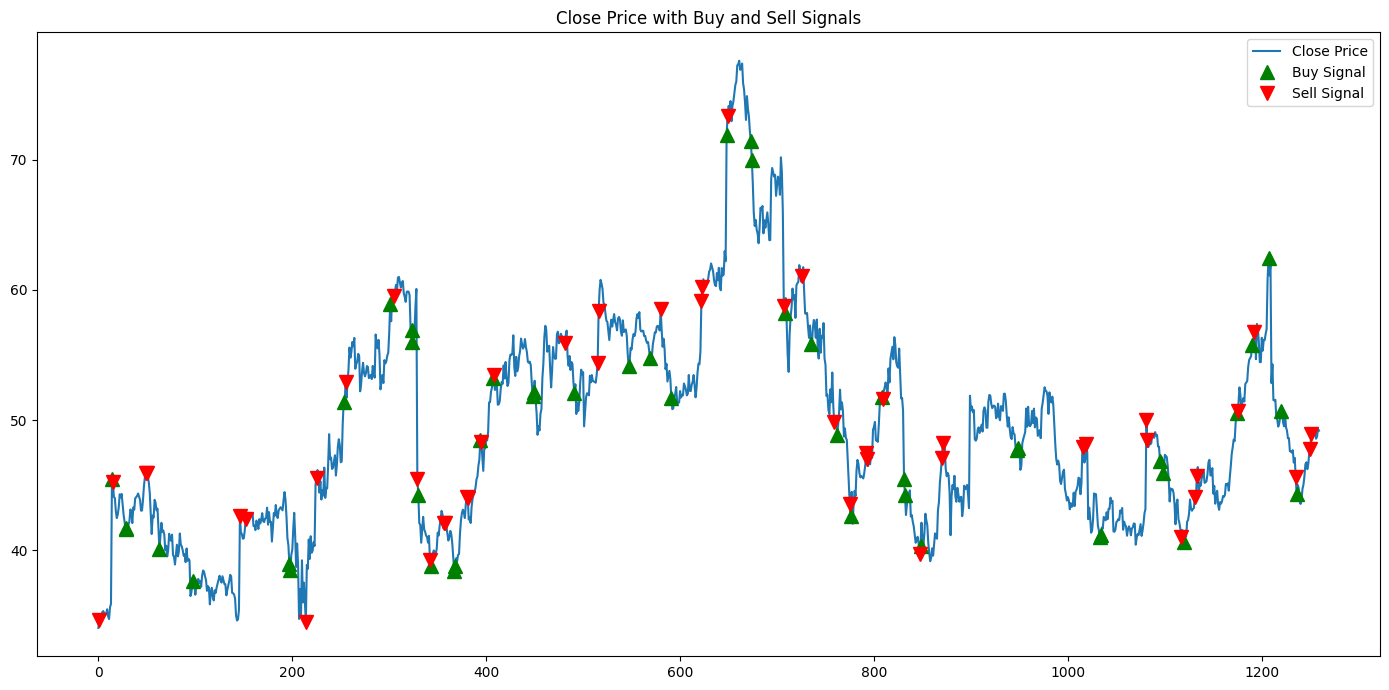

In [ ]:
plt.figure(figsize=(14, 7))
#plot for Buy and Sell Signals
#plot for closing price
plt.plot(data9.index,data9['Close'],label='Close Price')
#plot buy signals
plt.plot(buys3,data9['Close'][buys3],'^', markersize=10, color='g', label='Buy Signal')
#plot sell signals
plt.plot(sells3, data9['Close'][sells3],'v', markersize=10, color='r', label='Sell Signal')
plt.title('Close Price with Buy and Sell Signals')
plt.legend()
plt.tight_layout()
plt.show()

TradeWise DataFrame

In [ ]:
c1

,Returns for Trade in %,Type of Trade,Trade Close By,Max Drawdown for Trade,Max Dip for Trade,No. of stocks Traded,Capital
0,-31.436003,short,stop loss,2.153179,0.000000,288,6866.559712
1,7.848773,short,signal,8.467723,7.806675,151,7402.609712
2,10.432695,long,signal,3.051130,1.123786,177,8170.789889
3,12.796520,short,signal,14.596856,12.737571,177,9211.550066
4,13.320920,long,signal,11.049643,7.946545,244,10433.989578
5,8.067936,short,signal,14.104519,8.063258,246,11275.309086
6,-10.273084,long,stop loss,24.267151,10.264466,293,10117.958793
7,-12.779973,short,stop loss,6.946804,3.598352,222,8825.918793
8,-11.274782,short,stop loss,8.007121,2.313414,166,7834.899291
9,4.335403,short,signal,7.094384,4.313773,131,8172.879029


Daily DataFrame

In [ ]:
c2

,Date,Open,High,Low,Close,Adj Close,Volume,Portfolio Value,No. of Stocks,Profit from Initial Capital in %,Current Position
0,2019-05-16,33.660000,34.500000,33.080002,34.040001,34.040001,4267500,10000.000000,0,0.000000,0
1,2019-05-17,33.560001,35.060001,33.500000,34.610001,34.610001,4496400,10000.000000,288,0.000000,-1
2,2019-05-20,34.130001,34.689999,34.009998,34.660000,34.660000,2017000,9985.600288,288,-0.143997,-1
3,2019-05-21,34.919998,35.290001,34.750000,34.860001,34.860001,2028200,9928.000000,288,-0.720000,-1
4,2019-05-22,34.750000,35.389999,34.669998,35.250000,35.250000,1726500,9815.680288,288,-1.843197,-1
...,...,...,...,...,...,...,...,...,...,...,...
1255,2024-05-10,49.110001,49.360001,48.549999,49.099998,49.099998,955200,6481.868112,0,-35.181319,0
1256,2024-05-13,49.099998,49.669998,48.549999,48.570000,48.570000,967100,6481.868112,0,-35.181319,0
1257,2024-05-14,49.110001,49.540001,48.689999,48.730000,48.730000,1290400,6481.868112,0,-35.181319,0
1258,2024-05-15,48.779999,49.470001,48.240002,49.320000,49.320000,1255400,6481.868112,0,-35.181319,0


## Alternating Framework Complete Code

1)calculate1 is a function that executes all trades on the input data starting from the entry index to the exit index and returns the final capital after executing all the trades in this duration

In [ ]:
def calculate1(dataa,cap,entry_index,exit_index):
  current=dataa['signals'].iloc[entry_index]
  for i in range(entry_index+1,exit_index+1):
      if(current==1):
          if(dataa['signals'].iloc[i]==1):
              dataa['signals'].iloc[i]=0
          elif(dataa['signals'].iloc[i]==-1):
              current=0
      elif(current==-1):
          if(dataa['signals'].iloc[i]==-1):
              dataa['signals'].iloc[i]=0
          elif(dataa['signals'].iloc[i]==1):
              current=0
      else:
          if(dataa['signals'].iloc[i]==1):
              current=1
          elif(dataa['signals'].iloc[i]==-1):
              current=-1
  num_buys=0 #Total no. of buy signals
  num_sells=0 #Total no. of sell signals
  buys=[] #List containing index of each buy trade
  sells=[] #List containing index of each sell trade
  trades=[] #List containing index of all trades
  for i in range(entry_index,exit_index+1):
    if(dataa.loc[i,'signals']==1):
      num_buys=num_buys+1
      buys.append(i)
      trades.append(i)
    elif(dataa.loc[i,'signals']==-1):
      num_sells=num_sells+1
      sells.append(i)
      trades.append(i)
  if(num_buys!=num_sells):
    # changing the signal of the last day to close all trades.
    if(dataa['signals'].iloc[trades[num_buys+num_sells-1]]==1):
      dataa['signals'].iloc[exit_index]=-1
      trades.append(exit_index)
    else:
      dataa['signals'].iloc[exit_index]=1
      trades.append(exit_index)
  num_closetrades=max(num_buys,num_sells) #Total no. of close trades
  bal=cap
  position=0
  for i in range(entry_index,exit_index+1):
    if(cap>0):
      if dataa['signals'].iloc[i]==1 and position==0:
          no_of_stocks=int(cap/dataa['Close'].iloc[i])
          price=dataa['Close'].iloc[i]
          remain=cap-no_of_stocks*price
          index1=i
          type="long"
          position=1

      elif dataa['signals'].iloc[i]==-1 and position==1:
          returns=(((dataa['Close'].iloc[i]-price) / price)*100)
          cap=no_of_stocks*(dataa['Close'].iloc[i])+remain
          position=0
          index2=i
      elif dataa['signals'].iloc[i]==-1 and position==0:
          no_of_stocks=int(cap / dataa['Close'].iloc[i])
          price=dataa['Close'].iloc[i]
          position=-1
          type="short"
          index1=i

      elif dataa['signals'].iloc[i]==1 and position==-1:
          returns=(((price-dataa['Close'].iloc[i]) / price)*100)
          cap=bal+no_of_stocks*(price-dataa['Close'].iloc[i])
          position=0
          index2=i
    else:
      print("Capital Wiped-OFF")
  return cap

2)calculate2 is a function that executes only one trade on an input data starting from the input index and returns a TradeWise DataFrame for that single trade

In [ ]:
def calculate2(dataa,cap,entry_index,num):
  bal=cap
  position=0
  index1=0
  index2=0
  returns=0
  type="none"
  no_of_stocks=0
  remain=0
  price=0
  for i in range(entry_index,len(dataa)):
    if(cap>0):
      if dataa['signals'].iloc[i]==1 and position==0:
          no_of_stocks=int(cap/dataa['Close'].iloc[i])
          price=dataa['Close'].iloc[i]
          remain=cap-no_of_stocks*price
          index1=i
          type="long"
          position=1

      elif dataa['signals'].iloc[i]==-1 and position==1:
          returns=(((dataa['Close'].iloc[i]-price) / price)*100)
          cap=no_of_stocks*(dataa['Close'].iloc[i])+remain
          position=0
          index2=i
          break
      elif dataa['signals'].iloc[i]==-1 and position==0:
          no_of_stocks=int(cap / dataa['Close'].iloc[i])
          price=dataa['Close'].iloc[i]
          position=-1
          type="short"
          index1=i

      elif dataa['signals'].iloc[i]==1 and position==-1:
          returns=(((price-dataa['Close'].iloc[i]) / price)*100)
          cap=bal+no_of_stocks*(price-dataa['Close'].iloc[i])
          position=0
          index2=i
          break
    else:
      print("Capital Wiped-OFF")
  if(no_of_stocks>0):
    drawdown=[]
    portfolio_list=[]
    max1=bal
    min1=bal
    #print("1,2",index1,index2)
    for j in range(index1,index2):
      if(dataa['signals'].iloc[index1]==1):
        portfolio_list.append((no_of_stocks*dataa['Close'].iloc[j])+remain)
      else:
        portfolio_list.append(bal+(no_of_stocks*(price-dataa['Close'].iloc[j])))
    if(len(portfolio_list)>0):
      portfolio_list.append(portfolio_list[len(portfolio_list)-1])
    #print(portfolio_list)
    for i in range(len(portfolio_list)):
      if (portfolio_list[i]>max1):
        max1=portfolio_list[i]
      if (portfolio_list[i]<min1):
        min1=portfolio_list[i]
      drawdown.append(((max1-portfolio_list[i])/portfolio_list[i])*100)
    if(len(drawdown)>0):
      max__drawdown=(max(drawdown))
    else:
      max__drawdown=0
    max__dip=((((bal)-min1)/(bal))*100)
    twd=pd.DataFrame(columns=['Strategy','Entry Index', 'Exit Index','Trade Duration', 'Returns for Trade in %', 'Type of Trade', 'Max Drawdown for Trade', 'Max Dip for Trade', 'No. of stocks Traded','Capital'])
    new_row = {'Strategy':num,'Entry Index':index1, 'Exit Index':index2,'Trade Duration':index2-index1,'Returns for Trade in %':returns, 'Type of Trade':type, 'Max Drawdown for Trade':max__drawdown, 'Max Dip for Trade':max__dip, 'No. of stocks Traded':no_of_stocks,'Capital':cap}
    twd.loc[len(twd)]=new_row
    return twd
  else:
    twd=pd.DataFrame(columns=['Strategy','Entry Index', 'Exit Index','Trade Duration', 'Returns for Trade in %', 'Type of Trade', 'Max Drawdown for Trade', 'Max Dip for Trade', 'No. of stocks Traded','Capital'])
    new_row = {'Strategy':num,'Entry Index':index1, 'Exit Index':len(data7),'Trade Duration':0,'Returns for Trade in %':0, 'Type of Trade':"none", 'Max Drawdown for Trade':0, 'Max Dip for Trade':0, 'No. of stocks Traded':0,'Capital':cap}
    twd.loc[len(twd)]=new_row
    return twd

3)Complete Code of how I alternate between the Two Strategies.

In [ ]:
final_twd=pd.DataFrame(columns=['Strategy','Entry Index', 'Exit Index','Trade Duration', 'Returns for Trade in %', 'Type of Trade', 'Max Drawdown for Trade', 'Max Dip for Trade', 'No. of stocks Traded','Capital'])
#data2 contains signal of Bollinger Bands
#data7 contains signal of MACD
#data9 contains signal of RSI
z1=data7 # z1 contains signals corresponding to 1st Strategy
z2=data9 # z2 contains signals corresponding to 2nd Strategy
capitals=10000 #Initial Capital
i=0
strategy=1 # We take First Trade on Strategy 1
while(i<len(data7)):

  if(strategy==1):
    z1_copy = z1.copy()
    z3=calculate2(z1_copy,capitals,i,1)
    if(z3['No. of stocks Traded'].iloc[0]==0):
      break
    g=z3['Exit Index'].iloc[0]
    if(g==0):
      break;
    new_capital=z3['Capital'].iloc[0]
    final_twd=pd.concat([final_twd,z3],axis=0,ignore_index=True)
    z2_copy = z2.copy()
    p=calculate1(z2_copy,capitals,i,g)
    capitals=new_capital
    if(p>new_capital):
      strategy=2
      i=g
    else:
      i=g+1

  elif(strategy==2):
    z2_copy = z2.copy()
    z4=calculate2(z2_copy,capitals,i,2)
    if(z4['No. of stocks Traded'].iloc[0]==0):
      break
    f=z4['Exit Index'].iloc[0]
    if(f==0):
      break
    new_capital=z4['Capital'].iloc[0]
    final_twd=pd.concat([final_twd,z4],axis=0,ignore_index=True)
    z1_copy = z1.copy()
    p=calculate1(z1_copy,capitals,i,f)
    capitals=new_capital
    if(p>new_capital):
      strategy=1
      i=f
    else:
      i=f+1

4)Final TradeWise DataFrame of Alternate FrameWork Strategy.

In [ ]:
final_twd

,Strategy,Entry Index,Exit Index,Trade Duration,Returns for Trade in %,Type of Trade,Max Drawdown for Trade,Max Dip for Trade,No. of stocks Traded,Capital
0,1,26,49,23,-7.487124,short,11.214213,6.710393,233,9254.400699
1,2,49,63,14,12.777534,short,5.467574,0.021724,201,10434.270498
2,2,98,146,48,13.320920,long,11.076227,7.964141,277,11822.039944
3,2,152,197,45,8.067936,short,9.395408,4.891208,278,12772.799388
4,1,216,243,27,21.415613,long,5.770658,0.000000,331,15506.860050
5,1,253,266,13,5.704829,long,4.380958,0.368810,301,16388.790050
6,1,287,291,4,-6.332739,long,2.163460,1.662663,293,15351.569757
7,2,301,305,4,1.001358,long,2.304443,2.252535,260,15504.969757
8,2,306,323,17,5.005840,short,1.812436,1.763825,258,16278.969757
9,2,324,329,5,-18.806934,long,0.000000,0.000000,290,13225.268887


## Alternate FrameWork Strategy Metrics

In [ ]:
#Code

#Benchmark Return and Total Returns
balance=10000
num=int(balance/data2['Close'].iloc[0])
remain_=balance-num*data2['Close'].iloc[0]
br=((((num*data2['Close'].iloc[len(data2)-1])+remain_)-balance)/balance)*100
print("Benchmark Return is:",br,"%")
print("Total Returns of Strategy:",(((final_twd['Capital'].iloc[len(final_twd)-1])-balance)/balance)*100,"%")

#Gross Profit and Net Profit
gp=(final_twd['Capital'].iloc[len(final_twd)-1])-balance
print("Gross Profit is:",gp)
#Max Drawdown
maxDrawdown=max(final_twd['Max Drawdown for Trade'])
print("Maximun Drawdown is:",maxDrawdown)
#Avg. Drawdown
avgDrawdown=final_twd['Max Drawdown for Trade'].mean()
print("Average Drawdown is:",avgDrawdown)
#Max Dip
maxDip=max(final_twd['Max Dip for Trade'])
print("Maximun Dip is:",maxDip)
#Avg. Dip
avgDip=final_twd['Max Dip for Trade'].mean()
print("Average Dip is:",avgDip)
#Sharpe Ratio and Sortino Ratio
returns=final_twd['Returns for Trade in %']
rfr=[]
negative_returns=[]
entry=final_twd['Entry Index'].iloc[0]
exit=final_twd['Exit Index'].iloc[len(final_twd)-1]
for i in range(entry,exit+1):
  rfr.append(data3['Close'].iloc[i])
for i in range(len(final_twd)):
  if(final_twd['Returns for Trade in %'].iloc[i]<0):
    negative_returns.append(final_twd['Returns for Trade in %'].iloc[i])
mean_rfr=sum(rfr)/len(rfr)
mean_returns=returns.mean()
mean_neg_returns=sum(negative_returns)/len(negative_returns)
array=np.array(negative_returns)
std_neg_returns=np.std(array,ddof=1)
std_returns=returns.std()
y=((math.sqrt(252)))
sharpeRatio=y*((mean_returns-mean_rfr)/std_returns)
sortinoRatio=y*((mean_returns-mean_rfr)/std_neg_returns)
print("Calculated Sharpe Ratio of the strategy is:",sharpeRatio)
print("Calculated Sortino Ratio of the strategy is:",sortinoRatio)
#print("Calculated Sharpe Ratio of the strategy is:",sharpe_ratio(np.array(returns)))

Benchmark Return is: 44.37485 %
Total Returns of Strategy: 105.22007950999996 %
Gross Profit is: 10522.007950999996
Maximun Drawdown is: 21.65070432362271
Average Drawdown is: 6.046643597849016
Maximun Dip is: 9.833731586272705
Average Dip is: 3.0902034128884663
Calculated Sharpe Ratio of the strategy is: 0.2533904683074707
Calculated Sortino Ratio of the strategy is: 0.4352869258726182
